In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

In [2]:
data = pd.read_csv('C:/Users/user/Desktop/강의/ML/segment.csv')
data.head()

,region-centroid-col,region-centroid-row,region-pixel-count,short-line-density-5,short-line-density-2,vedge-mean,vegde-sd,hedge-mean,hedge-sd,intensity-mean,rawred-mean,rawblue-mean,rawgreen-mean,exred-mean,exblue-mean,exgreen-mean,value-mean,saturation-mean,hue-mean,binaryClass
0,218,178,9,0.111111,0.0,0.833333,0.547722,1.111110,0.544331,59.629600,52.4444,75.22220,51.222200,-21.55560,46.7778,-25.22220,75.22220,0.318996,-2.04055,N
1,113,130,9,0.000000,0.0,0.277778,0.250924,0.333333,0.365148,0.888889,0.0000,2.55556,0.111111,-2.66667,5.0000,-2.33333,2.55556,1.000000,-2.12325,N
2,202,41,9,0.000000,0.0,0.944448,0.772202,1.111110,1.025600,123.037000,111.8890,139.77800,117.444000,-33.44440,50.2222,-16.77780,139.77800,0.199347,-2.29992,N
3,32,173,9,0.000000,0.0,1.722220,1.781590,9.000000,6.749490,43.592600,39.5556,52.88890,38.333300,-12.11110,27.8889,-15.77780,52.88890,0.266914,-1.99886,N
4,61,197,9,0.000000,0.0,1.444440,1.515350,2.611110,1.925460,49.592600,44.2222,61.55560,43.000000,-16.11110,35.8889,-19.77780,61.55560,0.302925,-2.02227,N


In [3]:
print(len(data.columns))
print(len(data))

20
2310


In [4]:
X = data.iloc[:,:-1].values
y = data.iloc[:,19].values
print(X)
print(y)

[[ 2.18000e+02  1.78000e+02  9.00000e+00 ...  7.52222e+01  3.18996e-01
  -2.04055e+00]
 [ 1.13000e+02  1.30000e+02  9.00000e+00 ...  2.55556e+00  1.00000e+00
  -2.12325e+00]
 [ 2.02000e+02  4.10000e+01  9.00000e+00 ...  1.39778e+02  1.99347e-01
  -2.29992e+00]
 ...
 [ 8.00000e+01  7.20000e+01  9.00000e+00 ...  7.44444e+01  3.14606e-01
  -2.09022e+00]
 [ 9.80000e+01  1.33000e+02  9.00000e+00 ...  2.77778e+00  1.00000e+00
  -2.12325e+00]
 [ 1.90000e+01  1.47000e+02  9.00000e+00 ...  7.00000e+00  7.13228e-01
  -1.47564e+00]]
['N' 'N' 'N' ... 'N' 'N' 'P']


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [8]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1,40))
weight_options = ["uniform", "distance"]
metric_options = ["manhattan","euclidean", "minkowski"]
p_range = list(range(1,3))

param_grid = dict(n_neighbors = k_range, weights = weight_options, p = p_range)

grid = GridSearchCV(classifier, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X_train,y_train)

print (grid.best_score_)
print (grid.best_params_)
print (grid.best_estimator_)

0.9978354978354979
{'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=1,
                     weights='uniform')


In [9]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'manhattan', weights = 'uniform', p = 1)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

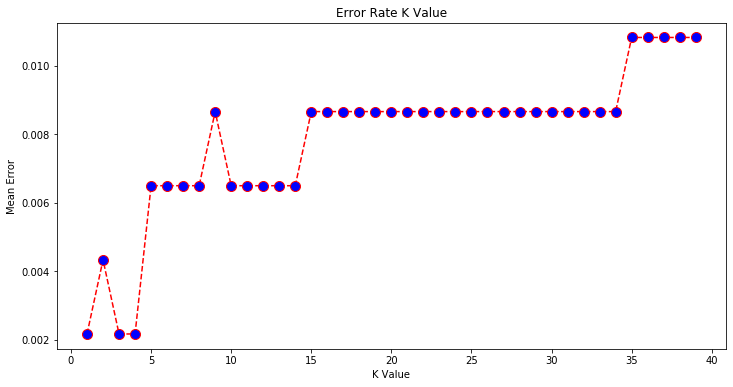

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [13]:
classifier = KNeighborsClassifier(n_neighbors=3, metric = 'manhattan', weights = 'uniform', p = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[397   1]
 [  0  64]]
              precision    recall  f1-score   support

           N       1.00      1.00      1.00       398
           P       0.98      1.00      0.99        64

    accuracy                           1.00       462
   macro avg       0.99      1.00      1.00       462
weighted avg       1.00      1.00      1.00       462

